# Dimensionality reduction

Given the high dimensionality of our dataset ( 2048 float values per head), we looked into using traditional principal component analysis.

Results show that PCA explained variance ratio is very low ( < 30% variance ), and a visualization of the first four dimensions show that the resulting data isn't clearly separable.

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

In [2]:
from cuml.decomposition import PCA
import cupy
import cuml
import cudf

from dask_cuda import LocalCUDACluster
import dask_cudf
from dask.distributed import Client
import dask.dataframe as dd

In [80]:
import plotly.graph_objs as go

In [81]:
client = Client("tcp://127.0.0.1:33313")
client

<Client: 'tcp://127.0.0.1:33313' processes=2 threads=2, memory=125.50 GiB>

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError
ERROR:asyncio:_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=CancelledError()>
concurrent.futures._base.CancelledError


In [8]:
gdf = dask_cudf.read_csv('file://../../representations/final/partitions/subset/*.csv')

In [12]:
type(gdf)

dask_cudf.core.DataFrame

In [10]:
cudf_df = gdf.compute()

In [13]:
type(cudf_df)

cudf.core.dataframe.DataFrame

In [14]:
pca = PCA(n_components=7, verbose=True)
fitted_gdf = pca.fit(cudf_df)

In [17]:
transformed_gdf = pca.transform(cudf_df)

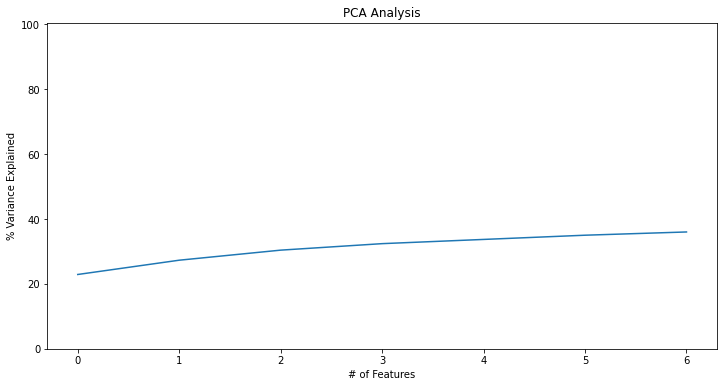

In [18]:
variance = pca.explained_variance_ratio_ 
var=np.cumsum(np.round(variance, 3)*100)
numpy_var = cupy.asnumpy(var.values)
plt.figure(figsize=(12,6))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(0,100.5)

plt.plot(numpy_var)

In [19]:
print(pca.explained_variance_ratio_)

0    0.229144
1    0.043818
2    0.030993
3    0.019817
4    0.013351
5    0.012617
6    0.010120
dtype: float64


In [21]:
df = transformed_gdf.to_pandas()

In [76]:
Scene = dict(xaxis = dict(title  = 'PC1'),yaxis = dict(title  = 'PC2'),zaxis = dict(title  = 'PC3'))
trace = go.Scatter3d(
    x=df.iloc[:,0],
    y=df.iloc[:,1],
    z=df.iloc[:,2],
    mode='markers',
    marker=dict(
        color=df.iloc[:,3],
        colorscale='Viridis',
        opacity=0.3))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene, height = 1000,width = 1000)
data = [trace]
fig = go.Figure(data = data, layout = layout)

In [77]:
img_bytes = fig.to_image(format="png")

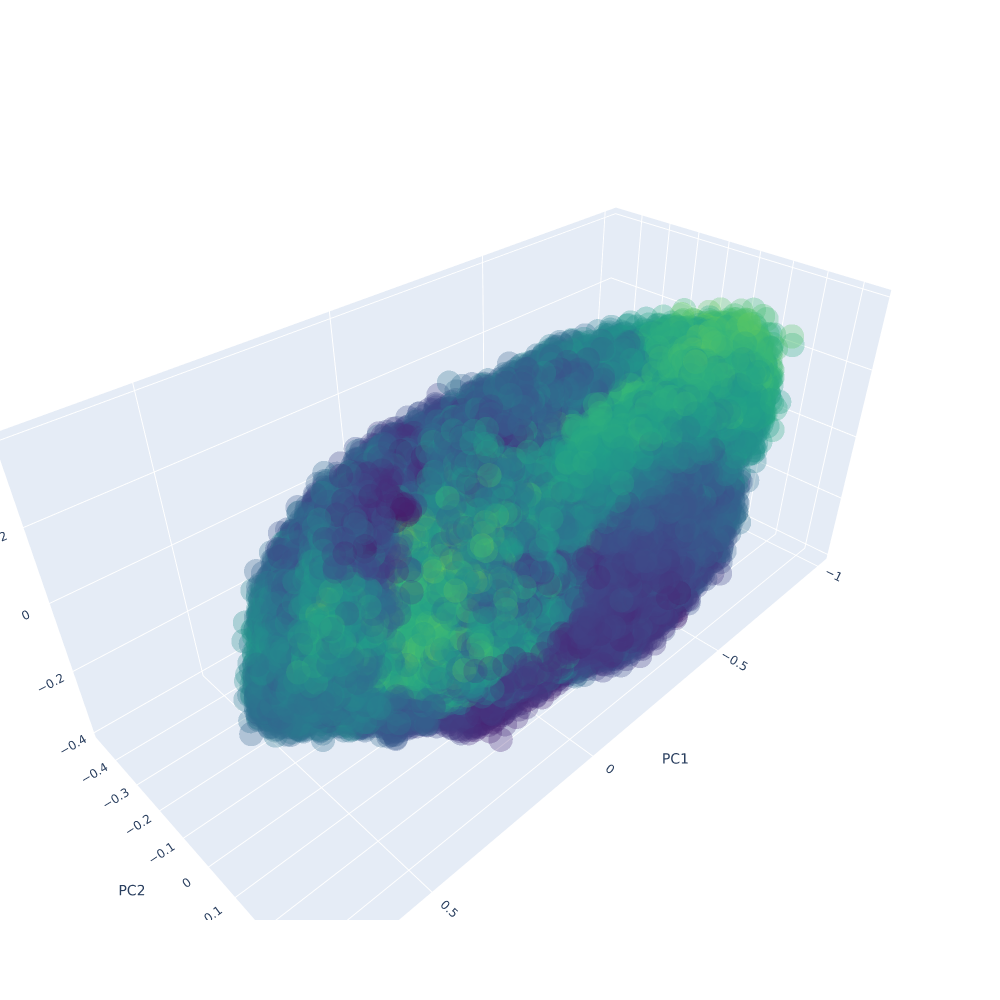

In [78]:
Image(img_bytes)

In [ ]:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [ ]:
fig.write_image("images/fig1.jpeg")